<a href="https://colab.research.google.com/github/mariahelenass/ML-Models-Course/blob/main/NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from yellowbrick.classifier import ConfusionMatrix
import seaborn as sns
import plotly.express as px


In [14]:
df = pd.read_csv('/content/diabetes-vid.csv')

In [15]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,dead
1,1,85,66,29,0,26.6,0.351,31,alive
2,8,183,64,0,0,23.3,0.672,32,dead
3,1,89,66,23,94,28.1,0.167,21,alive
4,0,137,40,35,168,43.1,2.288,33,dead


<ipython-input-16-6dc1c4c1753e>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

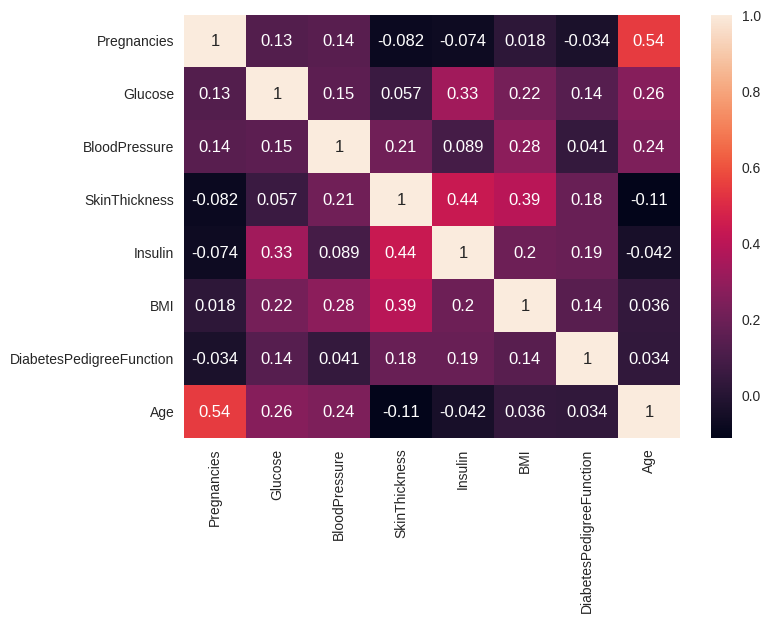

In [16]:
sns.heatmap(df.corr(), annot=True)

In [28]:
fig = px.scatter(df, x="SkinThickness", y="Insulin", color="Age")
fig.show()

In [27]:
fig = px.scatter(df, x="Glucose", y="Insulin", color="Age")
fig.show()

In [24]:
fig = px.scatter(df, x="BloodPressure", y="Age")
fig.show()

In [22]:
fig = px.scatter(df, x="Glucose", y="Age", color="Pregnancies")
fig.show()

In [35]:
y = df['Outcome']
X = df.drop(['Outcome'], axis=1)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=72)

In [40]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [41]:
predict = model.predict(X_test)

In [42]:
predict

array(['alive', 'alive', 'alive', 'alive', 'alive', 'alive', 'alive',
       'alive', 'alive', 'alive', 'dead', 'alive', 'alive', 'alive',
       'alive', 'alive', 'alive', 'alive', 'alive', 'alive', 'dead',
       'dead', 'alive', 'alive', 'dead', 'dead', 'alive', 'alive',
       'alive', 'alive', 'alive', 'dead', 'dead', 'dead', 'alive',
       'alive', 'alive', 'dead', 'alive', 'alive', 'alive', 'alive',
       'alive', 'dead', 'alive', 'dead', 'alive', 'dead', 'dead', 'alive',
       'dead', 'alive', 'dead', 'dead', 'alive', 'dead', 'alive', 'alive',
       'alive', 'alive', 'dead', 'dead', 'alive', 'dead', 'dead', 'alive',
       'alive', 'alive', 'alive', 'alive', 'alive', 'dead', 'alive',
       'alive', 'alive', 'alive', 'alive', 'dead', 'dead', 'dead', 'dead',
       'dead', 'alive', 'alive', 'dead', 'alive', 'alive', 'alive',
       'alive', 'alive', 'dead', 'dead', 'alive', 'alive', 'alive',
       'alive', 'alive', 'alive', 'alive', 'alive', 'alive', 'alive',
       'alive'

In [47]:
acuracia = accuracy_score(y_test, predict)

In [48]:
report = classification_report(y_test, predict)

In [49]:
print(report)

              precision    recall  f1-score   support

       alive       0.80      0.86      0.83       153
        dead       0.69      0.59      0.63        78

    accuracy                           0.77       231
   macro avg       0.75      0.73      0.73       231
weighted avg       0.76      0.77      0.77       231



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but GaussianNB was fitted with feature names



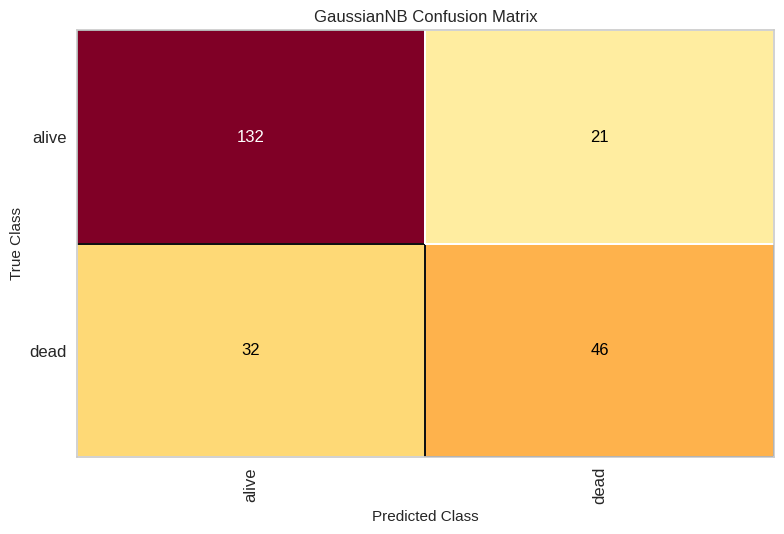

<Axes: title={'center': 'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [53]:
confusao = ConfusionMatrix(model, classes=['alive', 'dead'])
confusao.fit(X_train, y_train)
confusao.score(X_test, y_test)
confusao.poof()